In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
day_care_center_path = '../../dataset/day_care_center.csv'
transaction_price_path = '../../dataset/train_add__gu__park__day_care_count.csv'

day_care_data = pd.read_csv(day_care_center_path)
transaction_data = pd.read_csv(transaction_price_path)


In [3]:

import pandas as pd

# 어린이집 데이터 파일 경로
day_care_center_path = '../../dataset/day_care_center.csv'

# 어린이집 데이터 불러오기
day_care_data = pd.read_csv(day_care_center_path)

# 데이터 구조 확인 (구 정보 확인)
print(day_care_data.head())



    city    gu day_care_name day_care_type  day_care_baby_num  teacher_num  \
0  서울특별시  서대문구        가람어린이집           국공립                 70         11.0   
1  서울특별시  서대문구      가좌제일어린이집           국공립                 88         22.0   
2  서울특별시  서대문구       경찰청어린이집            직장                 90         23.0   
3  서울특별시  서대문구      고운햇살어린이집            가정                 18          5.0   
4  서울특별시  서대문구        고은어린이집           국공립                 93         20.0   

   nursing_room_num  playground_num  CCTV_num is_commuting_vehicle  \
0               5.0             1.0       7.0                    N   
1               5.0             2.0      10.0                    N   
2               6.0             1.0      32.0                    N   
3               3.0             0.0       4.0                    N   
4               7.0             2.0      10.0                    N   

  reference_date  
0     2018-07-31  
1     2018-07-31  
2     2018-07-31  
3     2018-07-31  
4     2018-07-3

In [4]:
# '구' 열을 기준으로 어린이집 개수를 세기
day_care_count_by_gu = day_care_data.groupby('gu').size().reset_index(name='어린이집 개수')

# '어린이집 개수'를 컬럼에 추가하기
day_care_data = day_care_data.merge(day_care_count_by_gu, on='gu', how='left')

# 구별 어린이집 개수 확인
print(day_care_count_by_gu)




      gu  어린이집 개수
0    강남구      223
1    강동구      272
2    강북구      167
3    강서구      997
4    관악구      271
5    광진구      197
6    구로구      334
7    금정구      106
8    금천구      168
9    기장군      178
10    남구      143
11   노원구      457
12   도봉구      255
13    동구       39
14   동래구      124
15   동작구      234
16  부산진구      165
17    북구      188
18   사상구      127
19   사하구      203
20    서구       40
21  서대문구      154
22   서초구      204
23   성동구      184
24   송파구      409
25   수영구       77
26   양천구      316
27   연제구       97
28   영도구       49
29  영등포구      266
30   은평구      283
31   종로구       78
32    중구       81
33   중랑구      242
34  해운대구      223


In [5]:
# 데이터 구조 확인 (컬럼 정보 확인)
day_care_data.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date,어린이집 개수
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31,154
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31,154
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31,154
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31,154
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31,154


In [6]:
# 어린이집 데이터 확인 및 필요한 열 선택 (예: '구', '어린이집 개수')
# 구별로 어린이집 개수를 집계
day_care_gu = day_care_data.groupby('gu')['어린이집 개수'].sum().reset_index()

# 아파트 실거래 데이터 확인 및 필요한 열 선택 (예: '구', '실거래가')
# 구별로 실거래가 평균을 계산
transaction_price_gu = transaction_data.groupby('gu')['transaction_real_price'].mean().reset_index()



In [7]:
# 두 데이터프레임을 '구'를 기준으로 병합
merged_data = pd.merge(transaction_price_gu, day_care_gu, on='gu')

# 병합된 데이터 확인
print(merged_data)



      gu  transaction_real_price  어린이집 개수
0    강남구            95167.633381    49729
1    강동구            46180.322386    73984
2    강북구            32846.523888    27889
3    강서구            35961.630328   994009
4    관악구            36149.745618    73441
5    광진구            56677.571810    38809
6    구로구            33589.535634   111556
7    금정구            22736.463471    11236
8    금천구            28286.295773    28224
9    기장군            19839.405922    31684
10    남구            23469.688425    20449
11   노원구            29212.908481   208849
12   도봉구            28289.357754    65025
13    동구            18717.596677     1521
14   동래구            23279.718287    15376
15   동작구            50891.528677    54756
16  부산진구            18753.698471    27225
17    북구            17981.371051    35344
18   사상구            14933.562957    16129
19   사하구            15141.810976    41209
20    서구            19592.257367     1600
21  서대문구            39217.828424    23716
22   서초구            93760.450548  

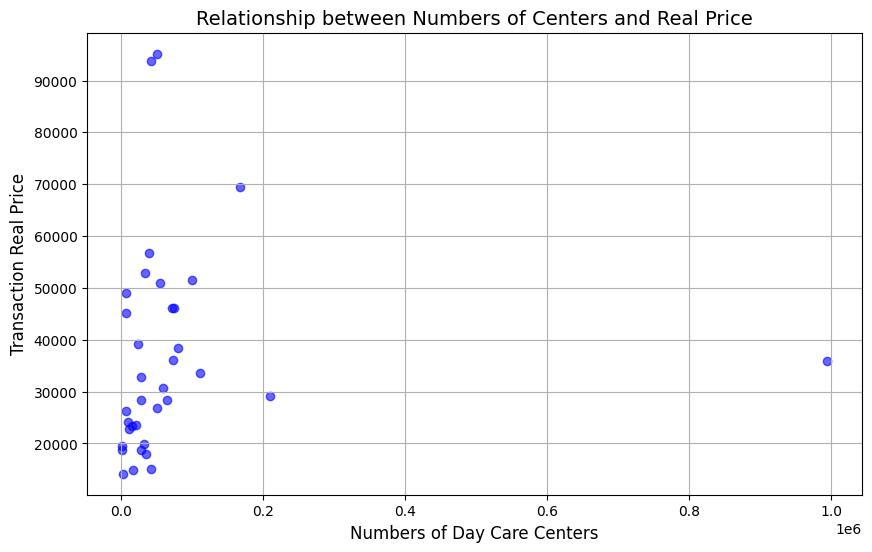

In [8]:
# 어린이집 개수와 실거래가의 관계를 시각화 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['어린이집 개수'], merged_data['transaction_real_price'], color='blue', alpha=0.6)

# 그래프 제목과 축 레이블 설정
plt.title('Relationship between Numbers of Centers and Real Price', fontsize=14)
plt.xlabel('Numbers of Day Care Centers', fontsize=12)
plt.ylabel('Transaction Real Price', fontsize=12)
plt.grid(True)

# 그래프 표시
plt.show()